#Project

**we used the next outline**

**~Unsupervised Learning | Clustering (DBSCAN)**

**~Unsupervised Learning | Clustering (K-Means)**

#**Importing libraries**

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline
sns.set()

#**Importing Data**

In [73]:
udemy = pd.read_csv('./udemy_courses-raw.csv')

In [74]:
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [75]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [76]:
udemy.drop([ "course_title" ,"url" , "published_timestamp"],axis=1,inplace=True)
udemy.head()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,1070968,True,200,2147,23,51,All Levels,1.5,Business Finance
1,1113822,True,75,2792,923,274,All Levels,39.0,Business Finance
2,1006314,True,45,2174,74,51,Intermediate Level,2.5,Business Finance
3,1210588,True,95,2451,11,36,All Levels,3.0,Business Finance
4,1011058,True,200,1276,45,26,Intermediate Level,2.0,Business Finance


In [77]:
udemy.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


#**Encoding**

In [78]:
le = LabelEncoder()
udemy['level'] = le.fit_transform(udemy['level'])
udemy['subject'] = le.fit_transform(udemy['subject'])

enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=int)

is_paid_encoded = enc.fit_transform(udemy[['is_paid']])

is_paid_encoded_df = pd.DataFrame(
    is_paid_encoded,
    columns=enc.get_feature_names_out(['is_paid'])
)

udemy = pd.concat([udemy.drop('is_paid', axis=1), is_paid_encoded_df], axis=1)


udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         3678 non-null   int64  
 1   price             3678 non-null   int64  
 2   num_subscribers   3678 non-null   int64  
 3   num_reviews       3678 non-null   int64  
 4   num_lectures      3678 non-null   int64  
 5   level             3678 non-null   int64  
 6   content_duration  3678 non-null   float64
 7   subject           3678 non-null   int64  
 8   is_paid_False     3678 non-null   int64  
 9   is_paid_True      3678 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 287.5 KB


In [79]:
udemy.head()

,course_id,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,is_paid_False,is_paid_True
0,1070968,200,2147,23,51,0,1.5,0,0,1
1,1113822,75,2792,923,274,0,39.0,0,0,1
2,1006314,45,2174,74,51,3,2.5,0,0,1
3,1210588,95,2451,11,36,0,3.0,0,0,1
4,1011058,200,1276,45,26,3,2.0,0,0,1


#**Data preprosseing**

In [80]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(udemy)

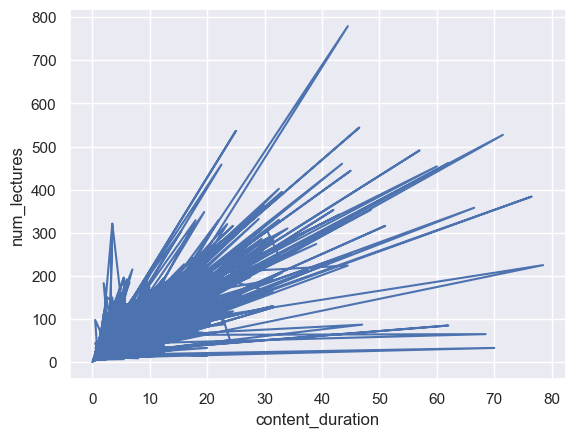

In [81]:
plt.plot(udemy['content_duration'], udemy['num_lectures'])
plt.xlabel('content_duration')
plt.ylabel('num_lectures')
plt.show()

#**Exploring Data**

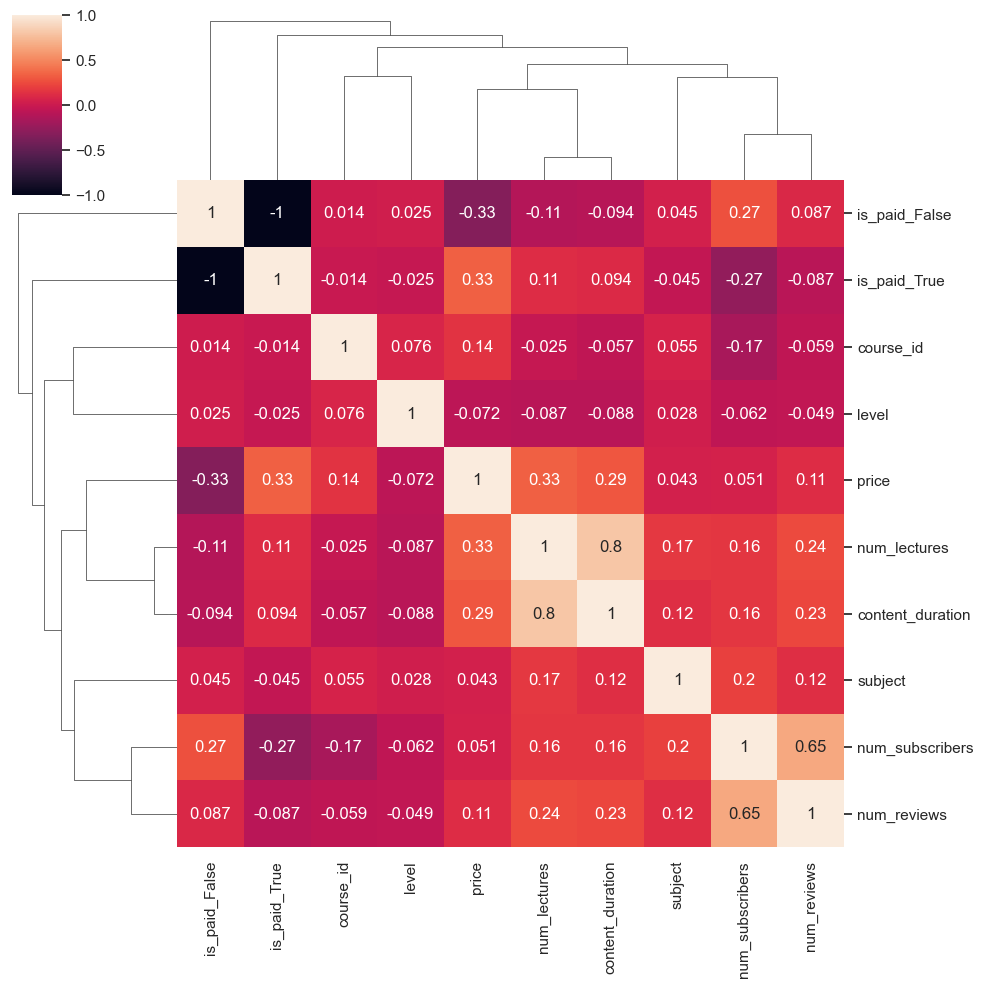

In [82]:
sns.clustermap(udemy.corr(),annot=True);

<Axes: xlabel='content_duration', ylabel='num_lectures'>

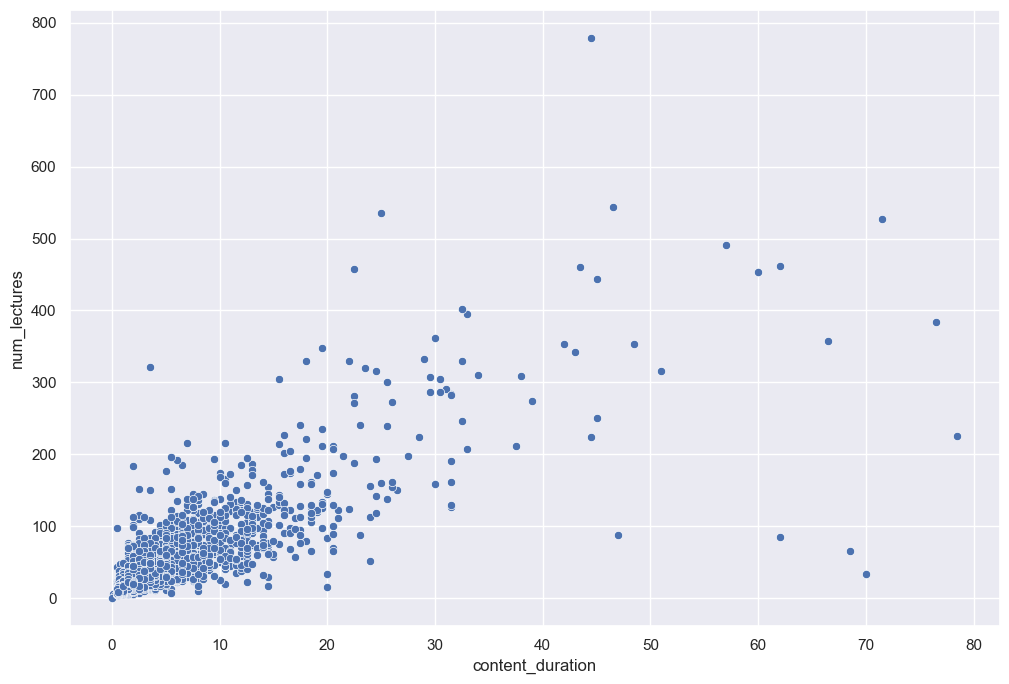

In [83]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='content_duration',y='num_lectures',data=udemy)

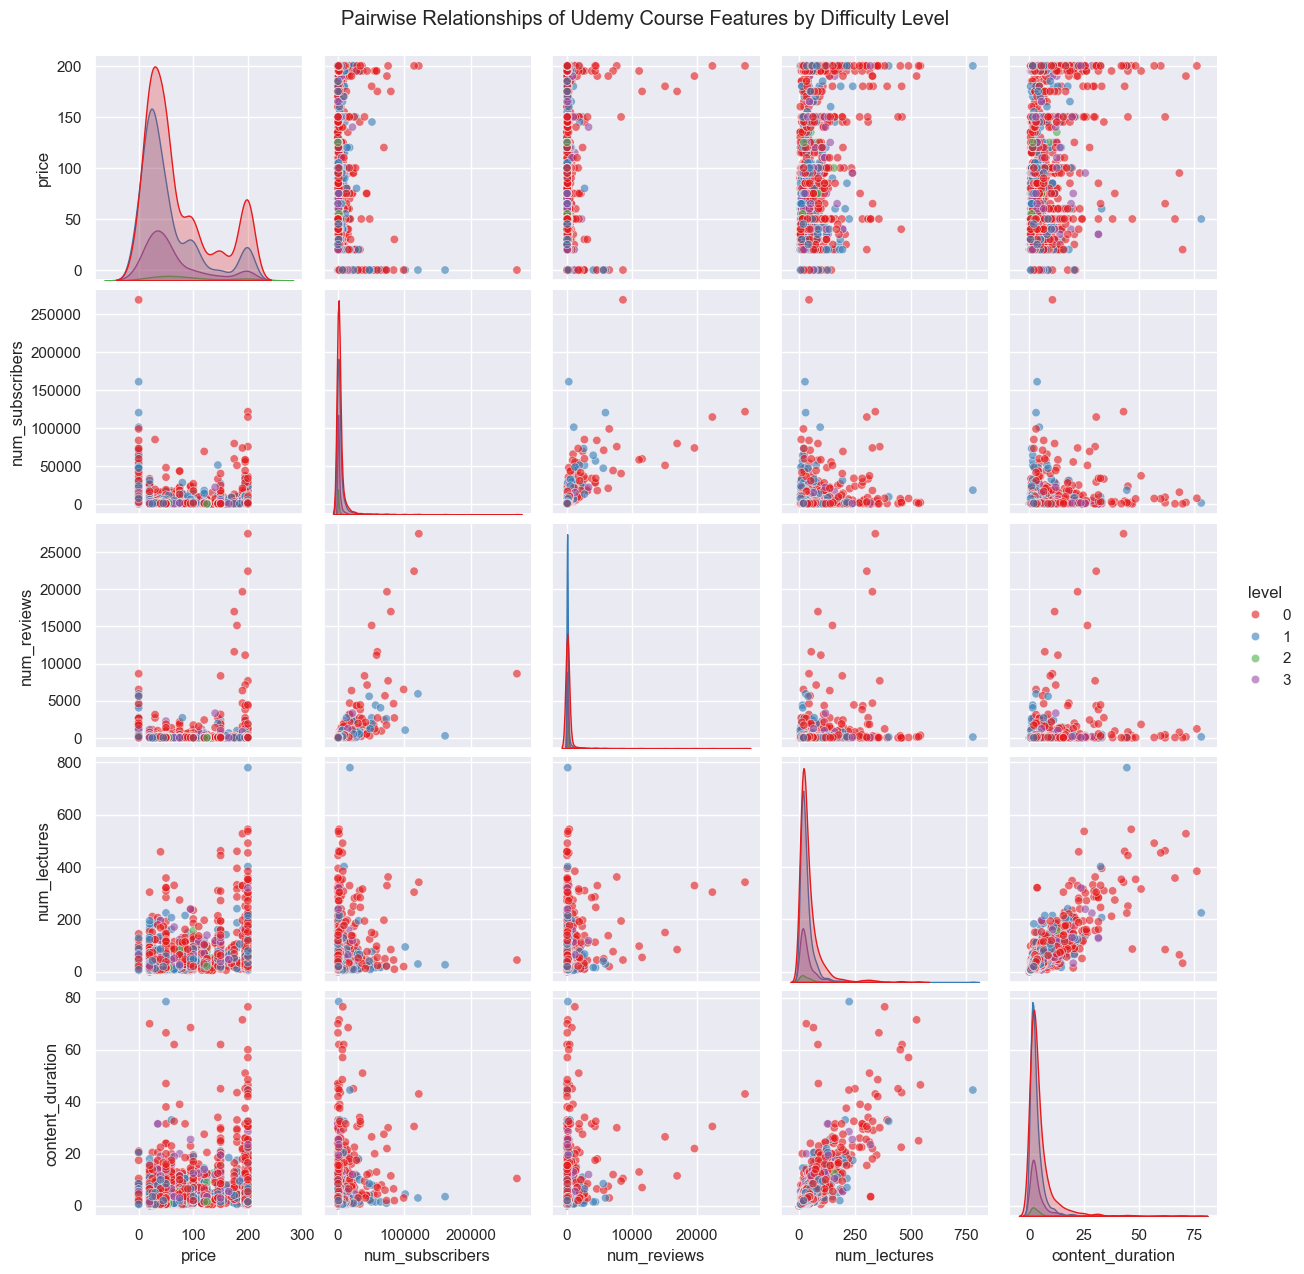

In [84]:
sns.pairplot(
    udemy,
    hue='level',
    palette='Set1',
    vars=['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration'],
    plot_kws={'alpha': 0.6}
)
plt.suptitle('Pairwise Relationships of Udemy Course Features by Difficulty Level', y=1.02)
plt.show()

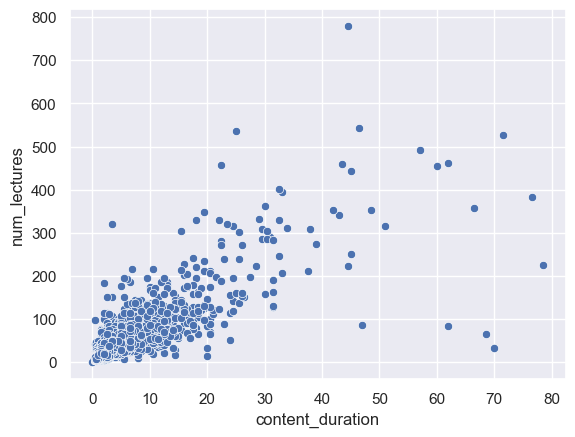

In [85]:
sns.scatterplot(data=udemy,x='content_duration',y='num_lectures')
plt.show()

#**DBSCAN Clustering**

#**DBSCAN with Unknown Value of Epsilon**

In [86]:
outlier_percent = []

for eps in np.linspace(0.001, 3, 50):

    dbscan = DBSCAN(eps=eps,min_samples=2*udemy.shape[1])
    dbscan.fit(scaled_X)

    perc_outliers = 10 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

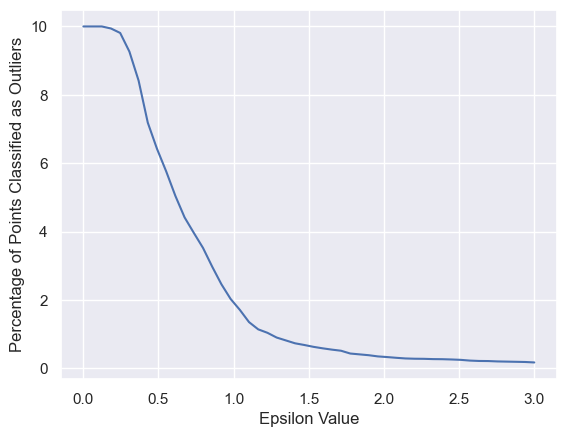

In [87]:
sns.lineplot(x=np.linspace(0.001, 3, 50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

In [88]:
model = DBSCAN(eps=1.3)
labels = model.fit(scaled_X)
labels

,eps,1.3
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [89]:
udemy['Labels'] = dbscan.labels_

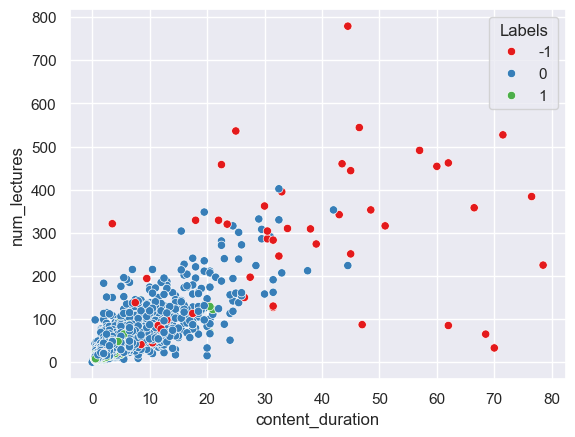

In [90]:
sns.scatterplot(data=udemy,x='content_duration',y='num_lectures',hue='Labels', palette='Set1')
plt.show()


#**Kmean clustering**

#**Model Training & Prediction**

In [91]:
x = udemy.iloc[:, [5, 7]].values

In [92]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
kmeans.fit(x)
kmeans.cluster_centers_

array([[ 4.49168207e-01,  1.00000000e+00],
       [-4.99600361e-15,  3.00000000e+00],
       [ 2.83710407e+00,  2.80542986e-01],
       [ 2.91472868e+00,  2.58139535e+00],
       [ 1.00000000e+00,  2.56914119e+00],
       [ 3.28185328e-01,  9.99200722e-15],
       [ 1.44328993e-15,  2.00000000e+00]])

In [93]:
score = silhouette_score(x, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.696608520268735


In [94]:
udemy

,course_id,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,is_paid_False,is_paid_True,Labels
0,1070968,200,2147,23,51,0,1.5,0,0,1,0
1,1113822,75,2792,923,274,0,39.0,0,0,1,-1
2,1006314,45,2174,74,51,3,2.5,0,0,1,0
3,1210588,95,2451,11,36,0,3.0,0,0,1,0
4,1011058,200,1276,45,26,3,2.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,100,1040,14,21,0,2.0,3,0,1,0
3674,1088178,25,306,3,42,1,3.5,3,0,1,0
3675,635248,40,513,169,48,0,3.5,3,0,1,0
3676,905096,50,300,31,38,0,3.0,3,0,1,0


In [95]:
from scipy.spatial.distance import cdist

def dunn_index(X, labels):
    clusters = np.unique(labels)
    n_clusters = len(clusters)
    intra_dists = []
    inter_dists = []

    for c in clusters:
        cluster_points = X[labels == c]
        if len(cluster_points) > 1:
            dists = cdist(cluster_points, cluster_points)
            intra_dists.append(np.max(dists))
        else:
            intra_dists.append(0)

    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            c1 = X[labels == clusters[i]]
            c2 = X[labels == clusters[j]]
            dist = cdist(c1, c2)
            inter_dists.append(np.min(dist))

    return np.min(inter_dists) / np.max(intra_dists)

In [96]:
kmeans.inertia_
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([5, 5, 2, ..., 1, 1, 4], shape=(3678,), dtype=int32)

In [97]:
udemy_clustered = udemy.copy()
udemy_clustered['Clusters'] = y_kmeans
udemy_clustered['Clusters'] = kmeans.labels_
udemy_clustered

,course_id,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,is_paid_False,is_paid_True,Labels,Clusters
0,1070968,200,2147,23,51,0,1.5,0,0,1,0,5
1,1113822,75,2792,923,274,0,39.0,0,0,1,-1,5
2,1006314,45,2174,74,51,3,2.5,0,0,1,0,2
3,1210588,95,2451,11,36,0,3.0,0,0,1,0,5
4,1011058,200,1276,45,26,3,2.0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,100,1040,14,21,0,2.0,3,0,1,0,1
3674,1088178,25,306,3,42,1,3.5,3,0,1,0,4
3675,635248,40,513,169,48,0,3.5,3,0,1,0,1
3676,905096,50,300,31,38,0,3.0,3,0,1,0,1


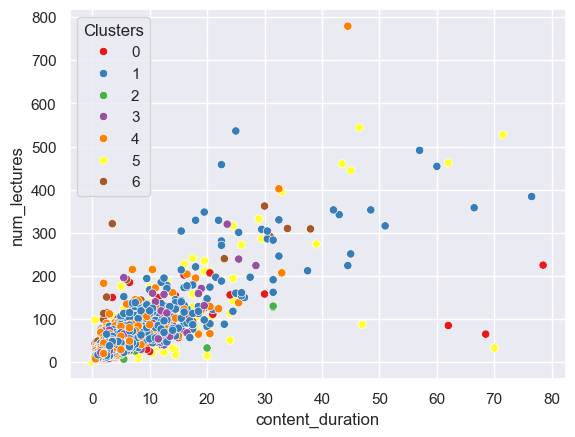

In [98]:

sns.scatterplot(
    data=udemy_clustered,
    x='content_duration',
    y='num_lectures',
    hue='Clusters',
    palette='Set1'
)
plt.show()



In [99]:
print(udemy_clustered.columns)



Index(['course_id', 'price', 'num_subscribers', 'num_reviews', 'num_lectures',
       'level', 'content_duration', 'subject', 'is_paid_False', 'is_paid_True',
       'Labels', 'Clusters'],
      dtype='object')


#**Finding the Optimal Number of Clusters (Elbow / Knee Method)**

In [100]:

wcss =[]

for i in range(1,15):

    kmeans = KMeans(i)

    kmeans.fit(scaled_X)

    wcss.append(kmeans.inertia_)


wcss

[36779.99999999998,
 28648.54001817271,
 24053.02293088364,
 21330.47538367315,
 19091.904326655884,
 16359.063183920416,
 15966.013230609355,
 13475.592095109543,
 12473.274702314618,
 11988.0841055928,
 11035.070386384174,
 10608.250251780046,
 9968.104258000334,
 9708.367014015126]

Text(0, 0.5, 'WCSS')

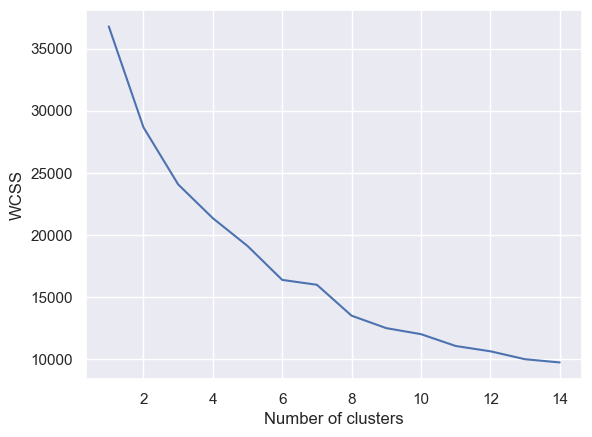

In [101]:

plt.plot(range(1,15),wcss)


plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#**Final model**

In [102]:
kmeans = KMeans(n_clusters =7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
udemy['Clusters'] = y_kmeans


<Axes: xlabel='content_duration', ylabel='num_lectures'>

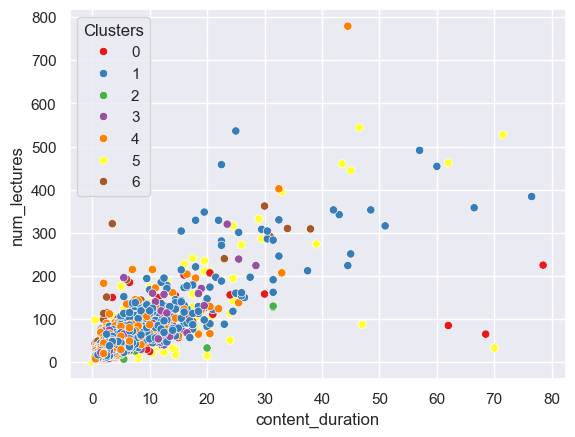

In [103]:
sns.scatterplot(
    data=udemy,
    x='content_duration',
    y='num_lectures',
    hue='Clusters',
    palette='Set1'
)

              Metric DBSCAN K-Means Better
    Silhouette Score 0.4575  0.0069 DBSCAN
Davies-Bouldin Index 1.4174  3.3563 DBSCAN
  Number of Clusters      3       7 DBSCAN
   Outliers Detected    208       0 DBSCAN


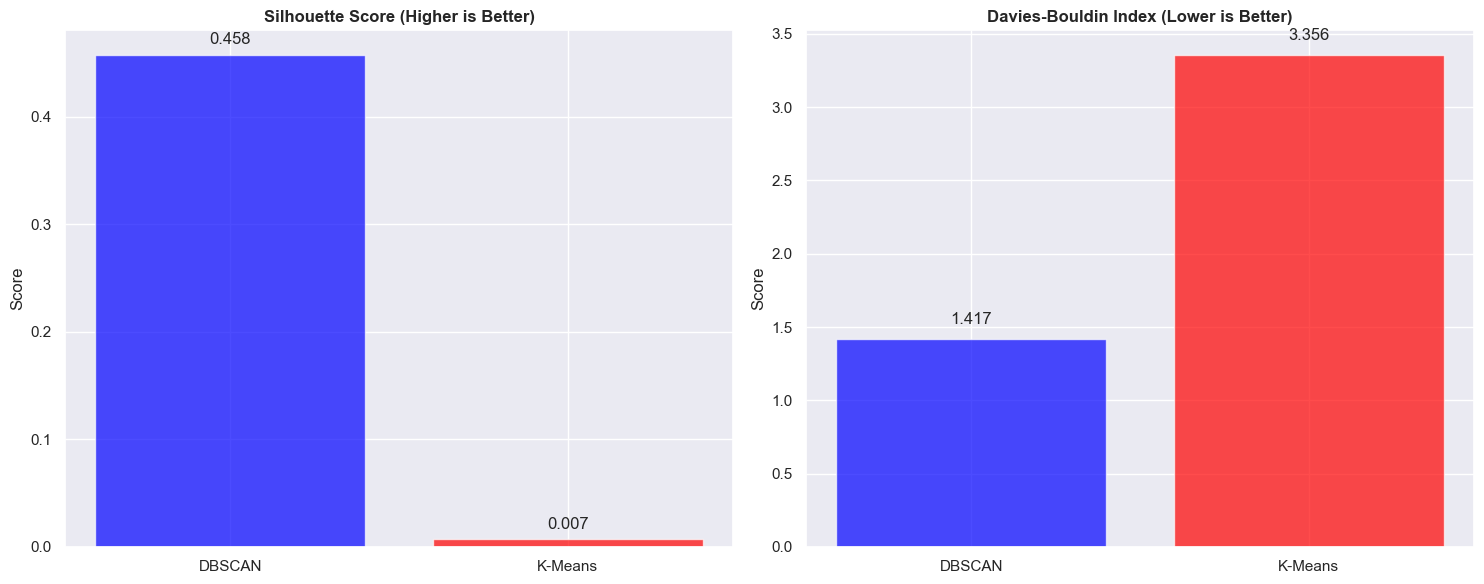

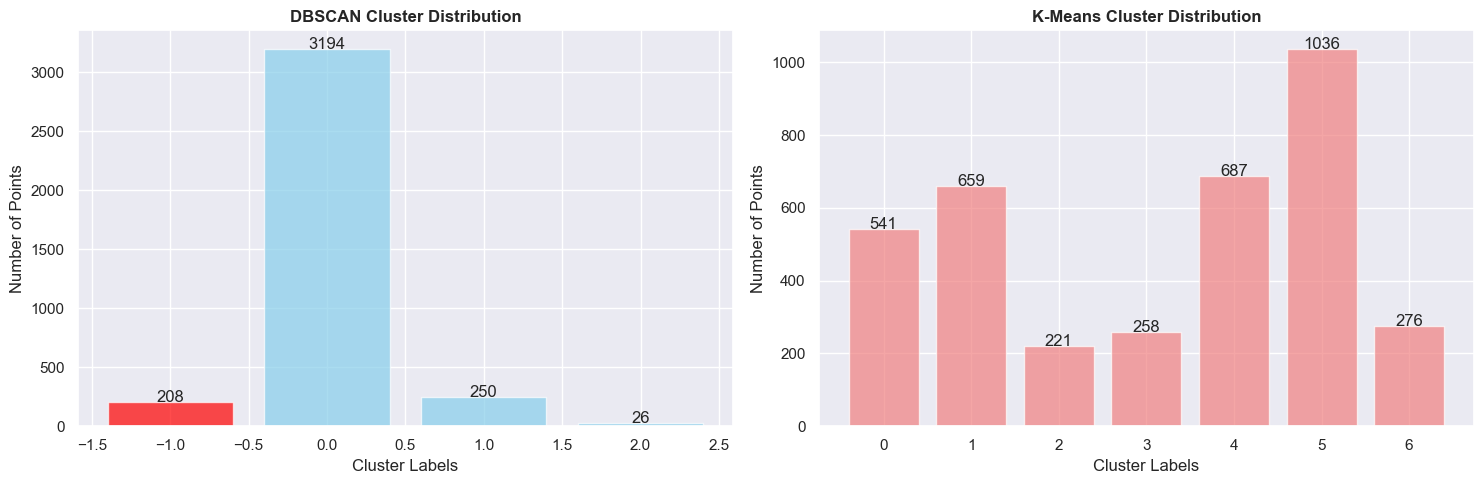

In [104]:

# DBSCAN
dbscan = DBSCAN(eps=1.3)
dbscan.fit(scaled_X)
dbscan_labels = dbscan.labels_
udemy['Labels'] = dbscan_labels

# K-Means
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans.fit(x)
kmeans_labels = kmeans.labels_
udemy['Clusters'] = kmeans_labels


from sklearn.metrics import silhouette_score, davies_bouldin_score

dbscan_silhouette = silhouette_score(scaled_X, dbscan_labels) if len(np.unique(dbscan_labels)) > 1 else -1
kmeans_silhouette = silhouette_score(scaled_X, kmeans_labels)

dbscan_davies_bouldin = davies_bouldin_score(scaled_X, dbscan_labels) if len(np.unique(dbscan_labels)) > 1 else float('inf')
kmeans_davies_bouldin = davies_bouldin_score(scaled_X, kmeans_labels)


scores_data = {
    'Metric': ['Silhouette Score', 'Davies-Bouldin Index', 'Number of Clusters', 'Outliers Detected'],
    'DBSCAN': [
        f"{dbscan_silhouette:.4f}",
        f"{dbscan_davies_bouldin:.4f}",
        f"{len(np.unique(dbscan_labels[dbscan_labels != -1]))}",
        f"{np.sum(dbscan_labels == -1)}"
    ],
    'K-Means': [
        f"{kmeans_silhouette:.4f}",
        f"{kmeans_davies_bouldin:.4f}",
        f"{len(np.unique(kmeans_labels))}",
        "0"
    ],
    'Better': [
        'K-Means' if kmeans_silhouette > dbscan_silhouette else 'DBSCAN',
        'K-Means' if kmeans_davies_bouldin < dbscan_davies_bouldin else 'DBSCAN',
        'DBSCAN' if len(np.unique(dbscan_labels[dbscan_labels != -1])) > 0 else 'K-Means',
        'DBSCAN'
    ]
}

scores_df = pd.DataFrame(scores_data)
print(scores_df.to_string(index=False))

# --- Visualization Scores ---
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Silhouette Score
axes[0].bar(['DBSCAN','K-Means'], [dbscan_silhouette, kmeans_silhouette], color=['blue','red'], alpha=0.7)
axes[0].set_title('Silhouette Score (Higher is Better)', fontweight='bold')
axes[0].set_ylabel('Score')
for i,v in enumerate([dbscan_silhouette, kmeans_silhouette]):
    axes[0].text(i, v+0.01, f'{v:.3f}', ha='center')

# Davies-Bouldin Score
axes[1].bar(['DBSCAN','K-Means'], [dbscan_davies_bouldin, kmeans_davies_bouldin], color=['blue','red'], alpha=0.7)
axes[1].set_title('Davies-Bouldin Index (Lower is Better)', fontweight='bold')
axes[1].set_ylabel('Score')
for i,v in enumerate([dbscan_davies_bouldin, kmeans_davies_bouldin]):
    axes[1].text(i, v+0.1, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

# --- Cluster Distribution Comparison ---
fig, axes = plt.subplots(1,2,figsize=(15,5))

# DBSCAN
dbscan_counts = pd.Series(dbscan_labels).value_counts().sort_index()
colors_dbscan = ['red' if lbl==-1 else 'skyblue' for lbl in dbscan_counts.index]
bars1 = axes[0].bar(dbscan_counts.index, dbscan_counts.values, color=colors_dbscan, alpha=0.7)
axes[0].set_title('DBSCAN Cluster Distribution', fontweight='bold')
axes[0].set_xlabel('Cluster Labels')
axes[0].set_ylabel('Number of Points')
for bar,count in zip(bars1, dbscan_counts.values):
    axes[0].text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.5, f'{count}', ha='center')

# K-Means
kmeans_counts = pd.Series(kmeans_labels).value_counts().sort_index()
bars2 = axes[1].bar(kmeans_counts.index, kmeans_counts.values, color='lightcoral', alpha=0.7)
axes[1].set_title('K-Means Cluster Distribution', fontweight='bold')
axes[1].set_xlabel('Cluster Labels')
axes[1].set_ylabel('Number of Points')
for bar,count in zip(bars2, kmeans_counts.values):
    axes[1].text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.5, f'{count}', ha='center')

plt.tight_layout()
plt.show()


# Finally, we suggest using the DBSCAN model


In [105]:
def safe_label_transform(le, value):
    if value in le.classes_:
        return le.transform([value])[0]
    else:
        return -1  

def predict_cluster_safe(new_course, model='dbscan'):
    new_df = pd.DataFrame([new_course])
    
    # Encode categorical safely
    le_cols = ['level', 'subject']
    for col in le_cols:
        new_df[col] = new_df[col].apply(lambda x: safe_label_transform(le, x))
    
    # One-Hot Encode 'is_paid'
    new_df_is_paid = enc.transform(new_df[['is_paid']])
    new_df_is_paid = pd.DataFrame(new_df_is_paid, columns=enc.get_feature_names_out(['is_paid']))
    new_df = pd.concat([new_df.drop('is_paid', axis=1), new_df_is_paid], axis=1)
    
    if model=='kmeans':
        new_X = new_df[['num_lectures', 'content_duration']].values
        cluster = kmeans.predict(new_X)
        print(f"Predicted K-Means Cluster: {cluster[0]}")
        return cluster[0]
    
    elif model=='dbscan':
        feature_columns = udemy.drop(['Labels','Clusters'], axis=1).columns
        new_df = new_df.reindex(columns=feature_columns, fill_value=0)
        scaled_new = scaler.transform(new_df)
        
        from sklearn.neighbors import NearestNeighbors
        nbrs = NearestNeighbors(n_neighbors=1).fit(scaled_X)
        distances, indices = nbrs.kneighbors(scaled_new)
        cluster_label = dbscan.labels_[indices[0][0]]
        if cluster_label==-1:
            print("Predicted DBSCAN Cluster: Outlier (-1)")
        else:
            print(f"Predicted DBSCAN Cluster: {cluster_label}")
        return cluster_label
    
    else:
        raise ValueError("Model must be 'kmeans' or 'dbscan'")

new_course_input = {
    'price': 200,
    'num_subscribers': 2147,
    'num_reviews': 123,
    'num_lectures': 51,
    'content_duration': 1.5,
    'level': 'all levels',        
    'subject': 'Business Finance',     
    'is_paid': 'paid'
}


predict_cluster_safe(new_course_input, model='kmeans')


predict_cluster_safe(new_course_input, model='dbscan')


Predicted K-Means Cluster: 3
Predicted DBSCAN Cluster: 0


np.int64(0)